# Importance sampling

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from vmc.interface import PyHarmonicOscillator, PyMetropolisAlgorithm, \
    PySimpleGaussian, PySampler, PyImportanceMetropolis
from vmc import run_experiment

from IPython.core.pylabtools import figsize
from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1.0
omega = 1.0
diffusion_coefficient = 0.5

step_length = 1.0
time_step = 0.5

In [4]:
alpha_min = 0.1
alpha_max = 0.9
num_alphas = 17

parameter_names = ["alpha"]

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)

In [5]:
num_particles = 500
num_dimensions = 3
num_samples = int(1e6)

num_thermalization_steps = 0

kwargs = {
    "num_samples": num_samples, "step_length": step_length,
    "num_thermalization_steps": num_thermalization_steps
}

In [6]:
wavefunction_importance = PySimpleGaussian(
    num_particles, num_dimensions, mass, omega, spread=step_length)
sampler_importance = PySampler(
    wavefunction_importance, PyHarmonicOscillator(),
    PyImportanceMetropolis(time_step, diffusion_coefficient))

In [7]:
df_importance = run_experiment(
    sampler_importance, wavefunction_importance, alphas,
    parameter_names, **kwargs)

100%|██████████| 17/17 [02:26<00:00,  8.61s/it]


In [8]:
wavefunction = PySimpleGaussian(
    num_particles, num_dimensions, mass, omega, spread=step_length)
sampler = PySampler(
    wavefunction, PyHarmonicOscillator(),
    PyMetropolisAlgorithm())

In [9]:
df = run_experiment(
    sampler, wavefunction, alphas,
    parameter_names, **kwargs)

100%|██████████| 17/17 [02:02<00:00,  7.23s/it]


In [10]:
display(df_importance)

,alpha,energy,variance,acceptance
0,0.10,1885.555685,4136.747252,0.973799
1,0.15,1324.450152,1114.734183,0.959504
2,0.20,1060.573472,442.245847,0.945641
3,0.25,919.246748,193.923394,0.927174
4,0.30,837.167097,84.102440,0.908020
5,0.35,789.150936,38.328194,0.889259
6,0.40,763.052677,13.983311,0.868486
7,0.45,751.532330,2.926406,0.846892
8,0.50,750.000000,0.000000,0.822778
9,0.55,755.752596,2.188012,0.799670


In [11]:
display(df)

,alpha,energy,variance,acceptance
0,0.10,1881.431326,8055.691054,0.758405
1,0.15,1321.841033,2075.623472,0.706407
2,0.20,1059.631640,817.327669,0.664614
3,0.25,918.336614,321.038420,0.628149
4,0.30,836.269344,132.656064,0.597599
5,0.35,788.912325,61.057078,0.567908
6,0.40,763.013368,19.809041,0.543688
7,0.45,751.479398,3.467935,0.519418
8,0.50,750.000000,0.000000,0.498205
9,0.55,755.718210,2.464578,0.478386


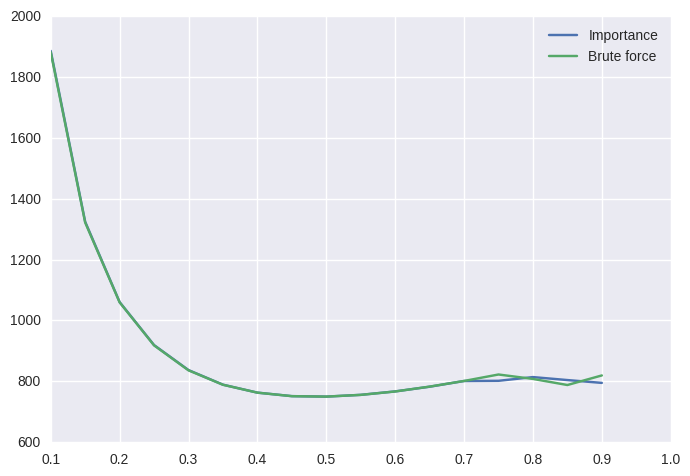

In [12]:
plt.plot(
    df_importance["alpha"], df_importance["energy"],
    label="Importance"
)
plt.plot(
    df["alpha"], df["energy"],
    label="Brute force"
)
plt.legend(loc="best")
plt.show()